In [7]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

from IPython import display
display.set_matplotlib_formats('svg')


plt.style.use('dark_background')

/tmp/ipykernel_31529/4102998519.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [8]:
# Define a range for x
x_range = np.linspace(-2, 2, 2001)

# Function (as a function)
def custom_function(x):
    return 2 * x ** 2 - 2 * x + 3

# Derivative function
def custom_derivative(x):
    return 4 * x - 2


In [9]:
# Random starting point
initial_point = np.random.choice(x_range, 1)
initial_value = initial_point[:]  # Store the initial value

# Learning parameters
fixed_learning_rate = 0.01
training_epochs_fixed = 50

# Run through training and store all the results
fixed_learning_params = np.zeros((training_epochs_fixed, 3))
for i in range(training_epochs_fixed):
    
    # Compute gradient
    gradient = custom_derivative(initial_point)

    # Fixed learning rate
    lr = fixed_learning_rate

    # Update parameter according to gradient descent
    initial_point = initial_point - lr * gradient

    # Store the parameters
    fixed_learning_params[i, 0] = initial_point
    fixed_learning_params[i, 1] = gradient
    fixed_learning_params[i, 2] = lr


/tmp/ipykernel_31529/173293584.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fixed_learning_params[i, 0] = initial_point
/tmp/ipykernel_31529/173293584.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fixed_learning_params[i, 1] = gradient


In [10]:
# Random starting point
initial_point = np.random.choice(x_range, 1)
initial_value = initial_point[:]  # Store the initial value

# Learning parameters
fixed_learning_rate = 0.01
training_epochs_gradient = 50

# Run through training and store all the results
gradient_learning_params = np.zeros((training_epochs_gradient, 3))
for i in range(training_epochs_gradient):
    
    # Compute gradient
    gradient = custom_derivative(initial_point)

    # Adapt the learning rate according to the gradient
    lr = fixed_learning_rate * np.abs(gradient)

    # Update parameter according to gradient descent
    initial_point = initial_point - lr * gradient

    # Store the parameters
    gradient_learning_params[i, 0] = initial_point
    gradient_learning_params[i, 1] = gradient
    gradient_learning_params[i, 2] = lr


/tmp/ipykernel_31529/3759842693.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 0] = initial_point
/tmp/ipykernel_31529/3759842693.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 1] = gradient
/tmp/ipykernel_31529/3759842693.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient_learning_params[i, 2] = lr


In [11]:
# Redefine parameters
time_based_learning_rate = 0.1
initial_point = initial_value

# Learning parameters
training_epochs_time = 50

# Run through training and store all the results
time_learning_params = np.zeros((training_epochs_time, 3))
for i in range(training_epochs_time):
    gradient = custom_derivative(initial_point)
    lr = time_based_learning_rate * (1 - (i + 1) / training_epochs_time)
    initial_point = initial_point - lr * gradient
    time_learning_params[i, 0] = initial_point
    time_learning_params[i, 1] = gradient
    time_learning_params[i, 2] = lr


/tmp/ipykernel_31529/3310074786.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_learning_params[i, 0] = initial_point
/tmp/ipykernel_31529/3310074786.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_learning_params[i, 1] = gradient


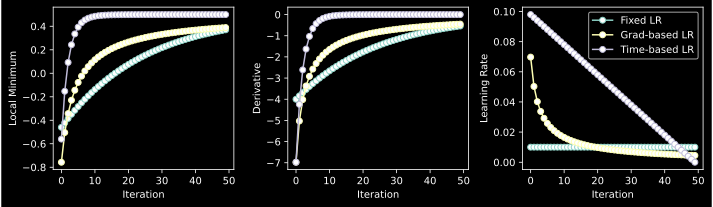

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Generate the plots
for i in range(3):
    ax[i].plot(fixed_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].plot(gradient_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].plot(time_learning_params[:, i], 'o-', markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(['Fixed LR', 'Grad-based LR', 'Time-based LR'])

plt.tight_layout()
plt.show()
